In [1]:
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

import IPython.display as ipd
import librosa.display

import matplotlib.pyplot as plt 
import seaborn as sns


import scipy

In [3]:
audio_path = 'myaudio.wav'
sample_rate, samples = wavfile.read(str(audio_path))

In [4]:
len(samples)

337307

### Audio without noise

In [5]:
ipd.Audio('myaudio.wav')
# print("Total audio length" , len(samples)/ sample_rate)

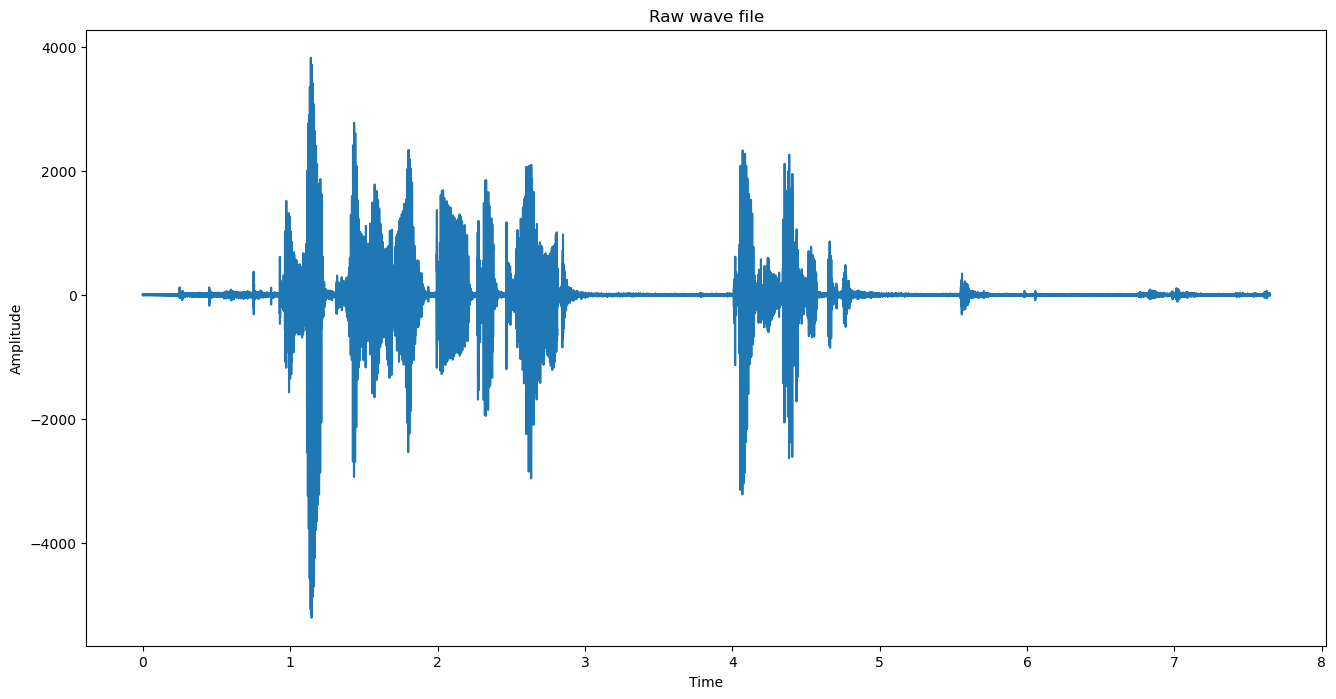

In [258]:
fig = plt.figure(figsize = (16, 8))
plt.title("Raw wave file")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(np.linspace(0,len(samples)/sample_rate, len(samples)), samples)

#Or could just use librosa.display.waveshow( y = samples, sr = sample_rate)

### Add noise to the audio signal

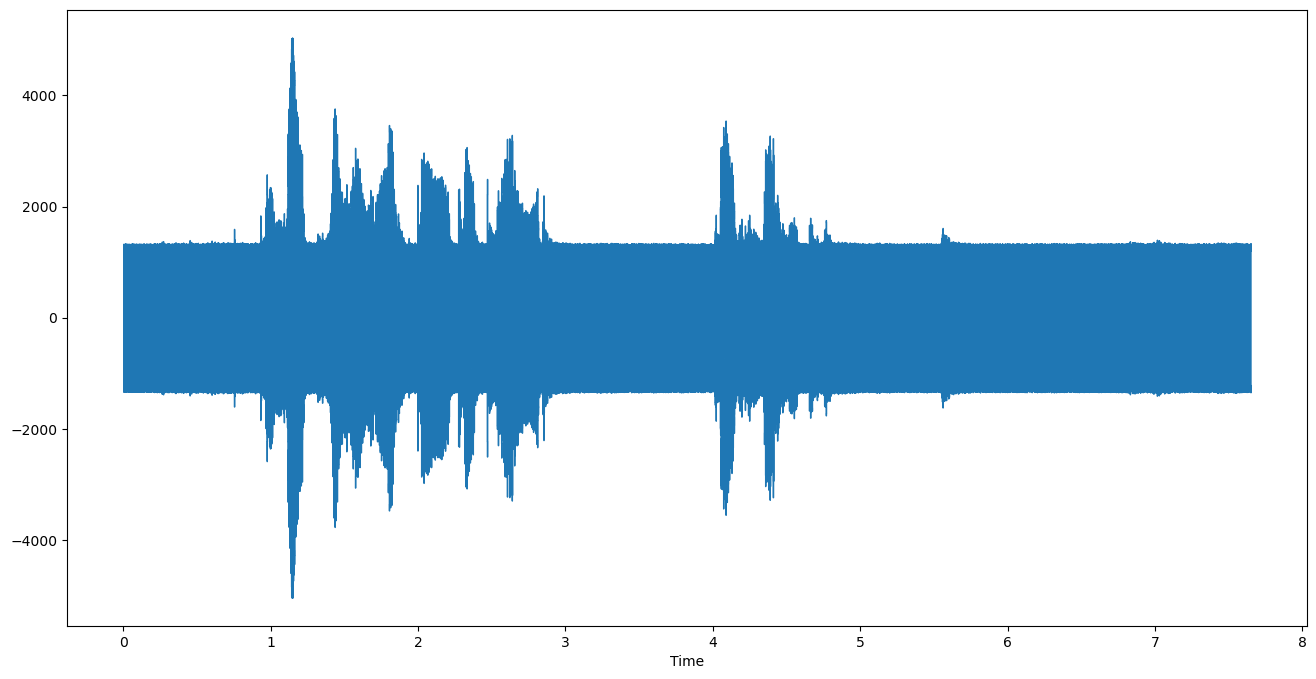

In [7]:
#Lets inject some noise into it 

def add_noise(data):
    noise_amp = 0.35 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.uniform(size = data.shape[0])
    return data

noisy_signal = add_noise(samples)
plt.figure(figsize = (16, 8))
librosa.display.waveshow(y = noisy_signal, sr = sample_rate)
ipd.Audio(noisy_signal, rate = sample_rate)


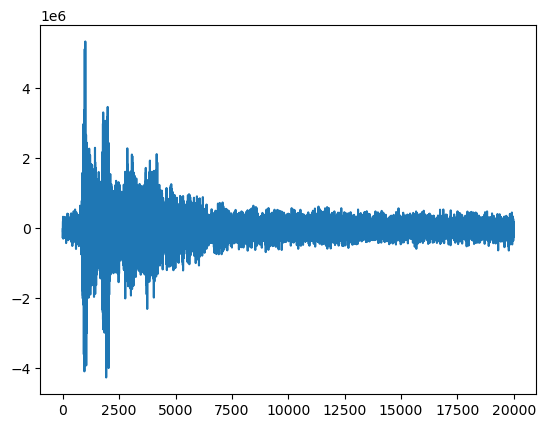

In [12]:
fft_noisy_signal = scipy.fft.fft(noisy_signal)
plt.plot(fft_noisy_signal[1:20000])

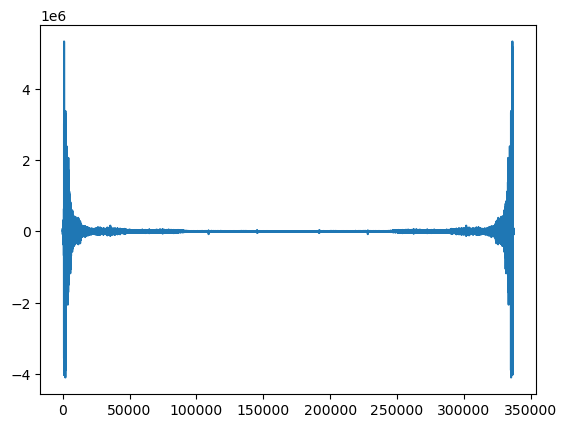

In [13]:
fft_signal_nonoise = scipy.fft.fft(samples)
plt.plot(fft_signal_nonoise)

### As you can see, the noise is consistent across all frequencies. 


In [14]:
ipd.Audio(np.real(scipy.fft.ifft(fft_signal_nonoise)), rate = sample_rate)

In [15]:
ipd.Audio(np.real(scipy.fft.ifft(np.where(np.abs(fft_noisy_signal) > 500000 , fft_noisy_signal , 0 ))), rate = sample_rate)

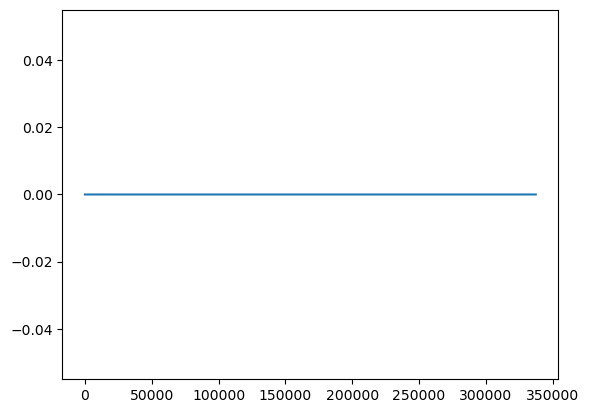

In [280]:
plt.plot(np.where(np.abs(noisy_signal) > 30000 , noisy_signal , 0 ))

In [206]:
def generate_fft(signal, sample_rate , startingFrom = 20 , percentOfFrequency = 1,  title = 'FFT for signal'):
    fft_signal = scipy.fft.fft(signal)
    magnitude = np.absolute(fft_signal)
    frequency = np.linspace(0, sample_rate, len(magnitude))
    fig = plt.figure( figsize = (16, 8 ))
    plt.title(title)
    plt.plot(frequency[startingFrom:int(len(frequency)/2 * percentOfFrequency) ] , magnitude[startingFrom:int(len(frequency)/2 * percentOfFrequency)] )
    return [fft_signal[startingFrom:], magnitude[startingFrom:], frequency[startingFrom:]]

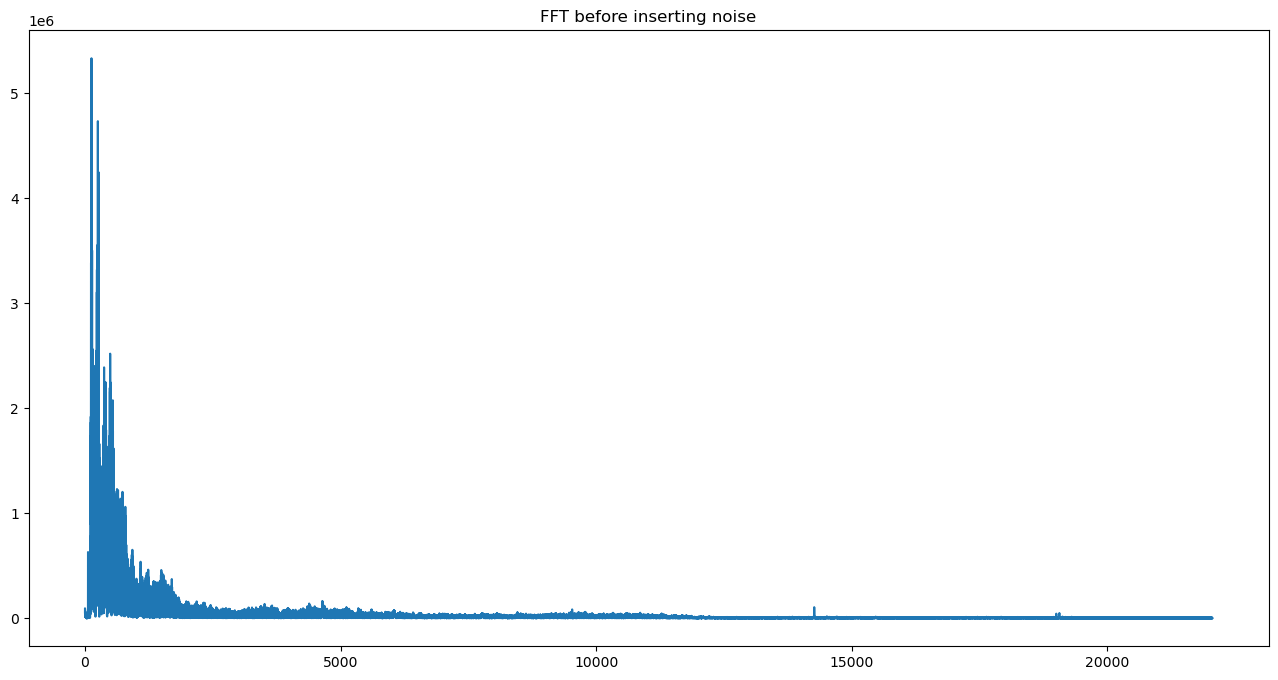

In [207]:

fft_signal, magnitude, frequency = generate_fft(samples, sample_rate, 1, 1, title = 'FFT before inserting noise')


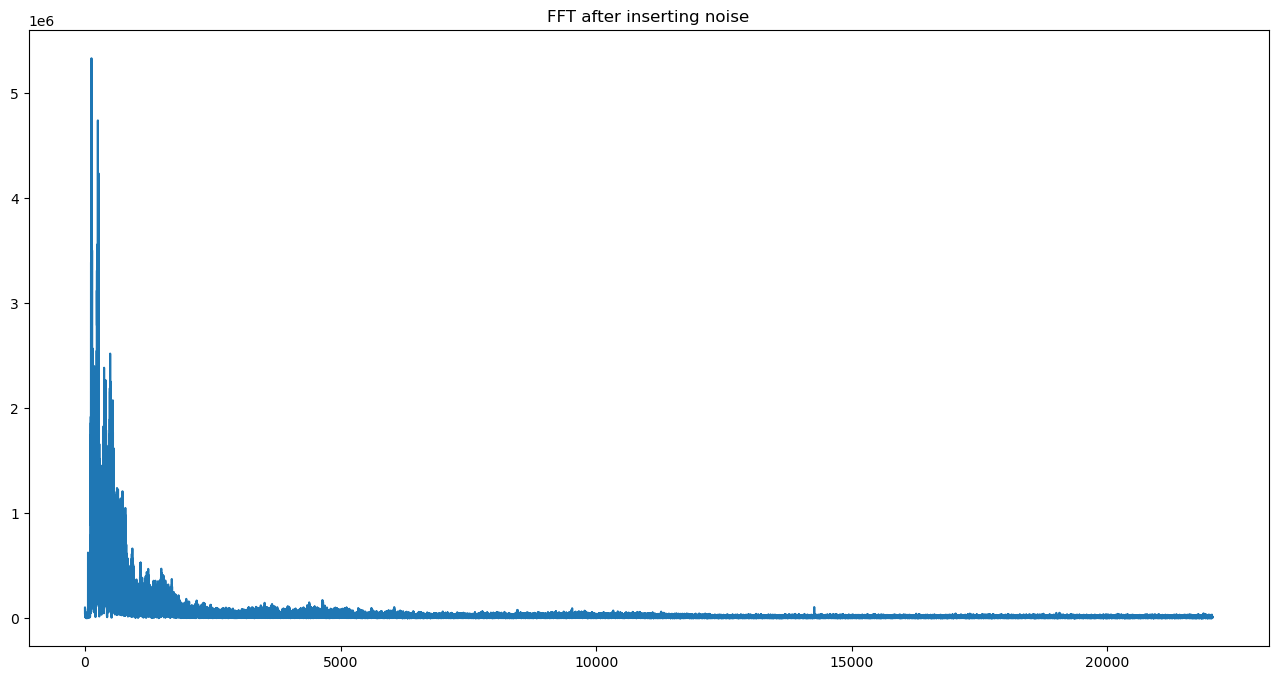

In [208]:
# sampes_fft = samples - samples.mean()
# fft_signal = np.fft.fft(samples)
# plt.plot(fft_signal[0:int(len(samples)/2.)])


fft_signal, magnitude, frequency = generate_fft(noisy_signal, sample_rate, 1, 1,title = 'FFT after inserting noise')


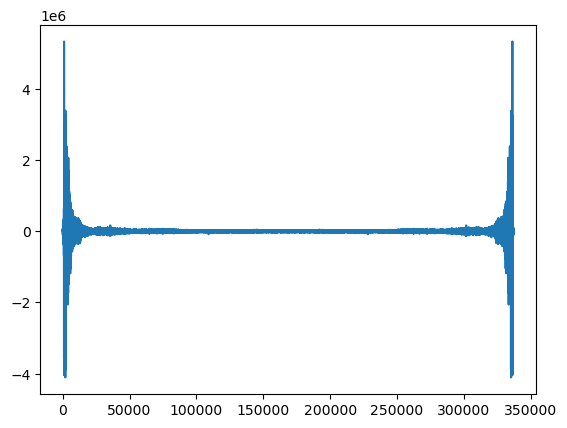

In [199]:
plt.plot(fft_signal)

In [151]:
np.abs(fft_signal)

array([51957.99871484, 72011.13265032, 87292.51134804, ...,
       87292.51134804, 72011.13265032, 51957.99871484])

In [209]:
np.count_nonzero(fft_signal == 0)

0

In [210]:
#max_amplitude 
max_amplitude = np.max(magnitude)

threshold = 0.1 * max_amplitude 

fft_signal[(magnitude < -threshold) & (magnitude > threshold)] = 0
    

In [216]:
np.count_nonzero([True, False, False])

1

In [215]:
fft_signal == 0

array([False, False, False, ..., False, False, False])

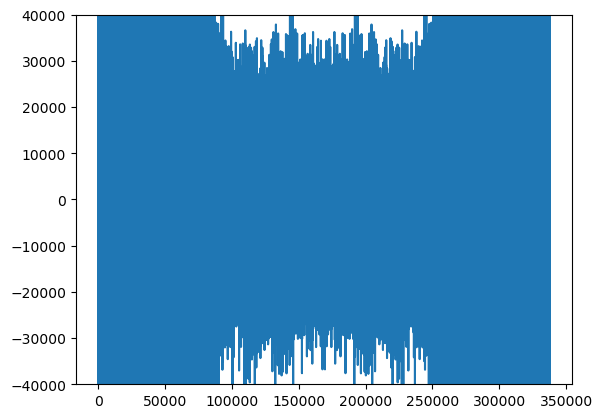

In [213]:
fft_signal = np.where(np.abs(fft_signal) > 20000,  fft_signal, 0)
plt.ylim(-40000, 40000)
plt.plot(fft_signal)

In [166]:
fft_signal

array([ 35952.69872194-37510.49299944j,  -6933.13368459-71676.59926987j,
       -73707.5754316 -46767.25201936j, ...,
       -73707.5754316 +46767.25201936j,  -6933.13368459+71676.59926987j,
        35952.69872194+37510.49299944j])

In [201]:
filtered_signal = scipy.fft.ifft(fft_signal)

real_filtered_signal = np.real(filtered_signal)

In [202]:
ipd.Audio(real_filtered_signal, rate = sample_rate )

In [ ]:
np.where